In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import copy

import json

np.random.seed(42)

from sklearn.metrics import silhouette_score

In [2]:
with open ('data/datasets.txt', "r") as json_file:
    datasets = json.loads(json_file.read())

In [3]:
from hard import pert_ident, softmax, pert_ident, pert_quad, kmeans_capacity_constraints, kmeans_modified, kmeans_constraints_exato

from k_means_constrained import KMeansConstrained

def funcao_objetivo(X,labels):
    obj_func = 0
    for i in range(clusters):
        obj_func+=np.sum(np.linalg.norm(X[labels == i] - X[labels == i].mean(axis=0), axis=1)**2)
    return obj_func

In [12]:
def def_color(X,labels,clusters):
    centroides = [X[labels==i].mean(axis=0) for i in range(clusters)]
    mapping_color = {}
    restantes = list(range(clusters))
    if clusters == 3:
        for point, color in [(np.array((8,20)),'b'), (np.array((16,15)),'r'),
                             (np.array((4,5)),'g')]:
            ind = np.argmin(np.linalg.norm([centroides[r] for r in restantes] - point, axis=1))
            mapping_color[restantes[ind]] = color
            restantes.remove(restantes[ind])
    elif clusters == 4:
        for point, color in [(np.array((5,20)),'b'), (np.array((10,22)),'r'),
                             (np.array((5,8)),'g'),(np.array((17,15)),'c')]:
            ind = np.argmin(np.linalg.norm([centroides[r] for r in restantes] - point, axis=1))
            mapping_color[restantes[ind]] = color
            restantes.remove(restantes[ind]) 
    elif clusters == 5:
        for point, color in [(np.array((6,24)),'b'), (np.array((14,25)),'r'),
                             (np.array((9,10)),'g'),(np.array((20,16)),'c'),(np.array((18,21)),'m')]:
            ind = np.argmin(np.linalg.norm([centroides[r] for r in restantes] - point, axis=1))
            mapping_color[restantes[ind]] = color
            restantes.remove(restantes[ind]) 
    elif clusters == 6:
        for point, color in [(np.array((3,25)),'b'), (np.array((6,25)),'r'),
                             (np.array((13,25)),'m'),(np.array((18,20)),'y'),
                             (np.array((8,8)),'g'),(np.array((20,15)),'c')]:
            ind = np.argmin(np.linalg.norm([centroides[r] for r in restantes] - point, axis=1))
            mapping_color[restantes[ind]] = color
            restantes.remove(restantes[ind])
    return mapping_color

In [5]:
def def_marker(color):
    maker_color = {'b':'o',
                   'r':'v',
                   'm':'s',
                   'y':'^',
                   'g':'P',
                   'c':'*'}
    return maker_color[color]

### Equi-sized

In [6]:
for path in datasets.keys():
    data = datasets[path]
    n_samples = data['n_samples']
    clusters = data['clusters']
    cluster_std = data['cluster_std']
    print('\033[1mConjunto\033[0m',path)
    print('n_samples', n_samples)
    print('clusters',clusters)
    print('cluster_std',cluster_std)
    print('\n')

Conjunto data_1
n_samples 120
clusters 3
cluster_std 2


Conjunto data_2
n_samples 120
clusters 3
cluster_std 3


Conjunto data_3
n_samples 120
clusters 4
cluster_std 2


Conjunto data_4
n_samples 120
clusters 4
cluster_std 3


Conjunto data_5
n_samples 120
clusters 5
cluster_std 2


Conjunto data_6
n_samples 120
clusters 5
cluster_std 3


Conjunto data_7
n_samples 120
clusters 6
cluster_std 2


Conjunto data_8
n_samples 120
clusters 6
cluster_std 3


Conjunto data_9
n_samples 240
clusters 3
cluster_std 2


Conjunto data_10
n_samples 240
clusters 3
cluster_std 3


Conjunto data_11
n_samples 240
clusters 4
cluster_std 2


Conjunto data_12
n_samples 240
clusters 4
cluster_std 3


Conjunto data_13
n_samples 240
clusters 5
cluster_std 2


Conjunto data_14
n_samples 240
clusters 5
cluster_std 3


Conjunto data_15
n_samples 240
clusters 6
cluster_std 2


Conjunto data_16
n_samples 240
clusters 6
cluster_std 3


Conjunto data_17
n_samples 360
clusters 3
cluster_std 2


Conjunto data_18
n_samp

Conjunto Original: 7 


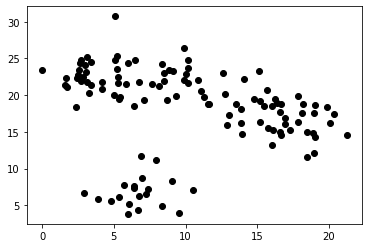

Aplicação do kmeans_capacity_constraints com grau de pertencimento identidade


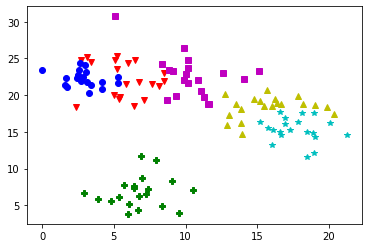

Aplicação do kmeans_capacity_constraints com grau de pertencimento quadrático


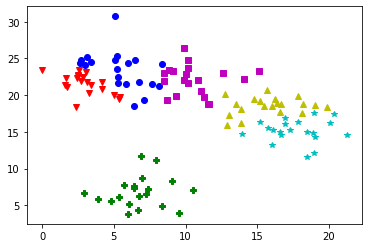

Aplicação do kmeans_capacity_constraints com grau de pertencimento softmax


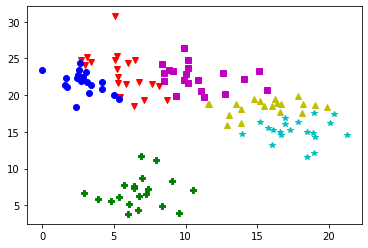

Aplicação do kmeans_constraints_exato


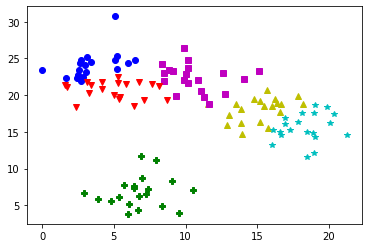

Aplicação do kmeans_modified


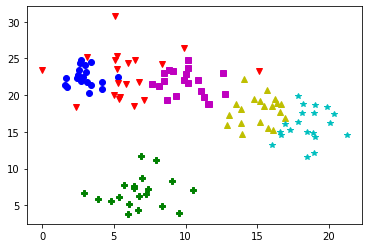

Aplicação do kmeans_constraints_bradley_bennett_demiriz


<Figure size 432x288 with 0 Axes>

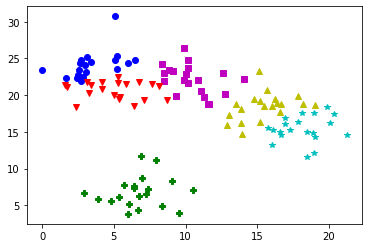


Funções objetivo: [872.6894130220745, 719.419507894077, 716.8275386389371, 848.0541391355703, 767.070392132373, 807.2250296344113]

Silhuetas obtidas: [0.35479831151449115, 0.3910603216285012, 0.38886261560742785, 0.33079149138520064, 0.36240023607532995, 0.3477141562510958] 


Conjunto Original: 8 


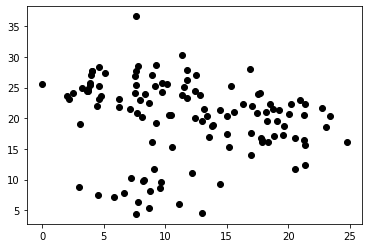

Aplicação do kmeans_capacity_constraints com grau de pertencimento identidade


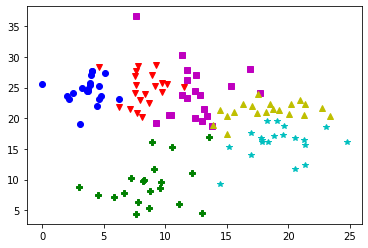

Aplicação do kmeans_capacity_constraints com grau de pertencimento quadrático


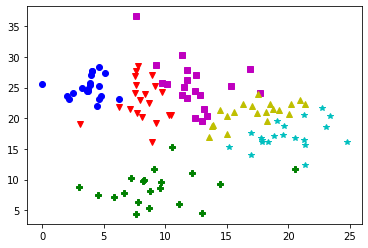

Aplicação do kmeans_capacity_constraints com grau de pertencimento softmax


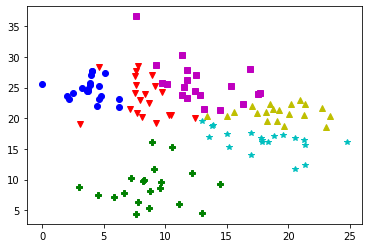

Aplicação do kmeans_constraints_exato


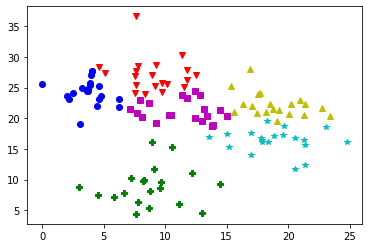

Aplicação do kmeans_modified


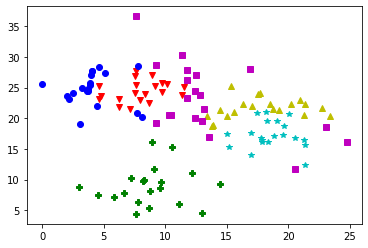

Aplicação do kmeans_constraints_bradley_bennett_demiriz


<Figure size 432x288 with 0 Axes>

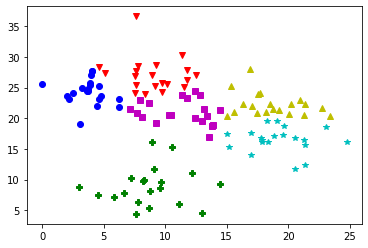


Funções objetivo: [2081.419096481868, 1236.9468127628543, 1239.2080198887024, 1578.7018587355572, 1551.4764211399824, 1492.6359325916746]

Silhuetas obtidas: [0.22857383469102727, 0.3878055900563762, 0.38934077885666174, 0.30571250348013435, 0.3157176339854371, 0.31796074122746487] 


Conjunto Original: 16 


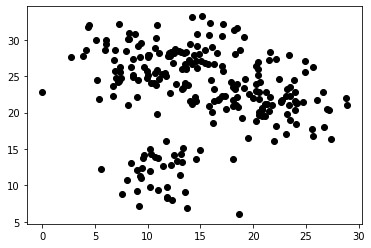

Aplicação do kmeans_capacity_constraints com grau de pertencimento identidade


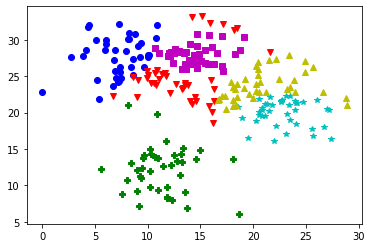

Aplicação do kmeans_capacity_constraints com grau de pertencimento quadrático


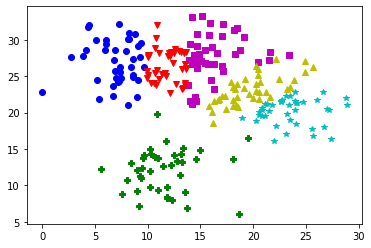

Aplicação do kmeans_capacity_constraints com grau de pertencimento softmax


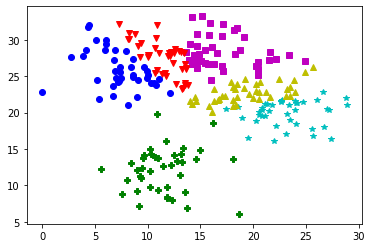

Aplicação do kmeans_constraints_exato


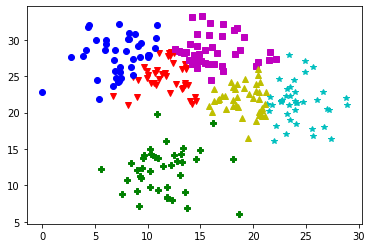

Aplicação do kmeans_modified


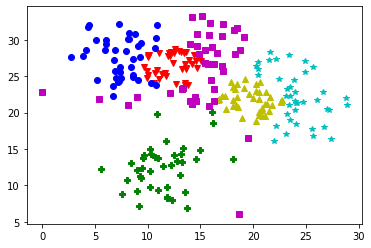

Aplicação do kmeans_constraints_bradley_bennett_demiriz


<Figure size 432x288 with 0 Axes>

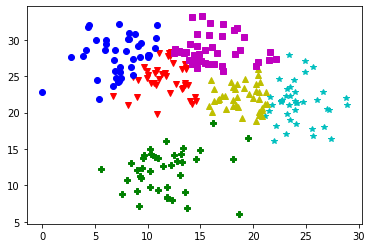


Funções objetivo: [3776.592722283837, 2564.6762700118916, 2550.1226565658444, 3160.2976745635056, 2796.7682301267396, 2903.891500858665]

Silhuetas obtidas: [0.2686354395283475, 0.359680759106388, 0.3559134412685297, 0.32304901544176895, 0.3174195434965478, 0.298033624070683] 


Conjunto Original: 22 


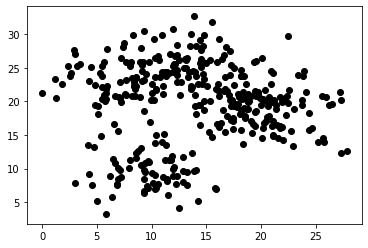

Aplicação do kmeans_capacity_constraints com grau de pertencimento identidade


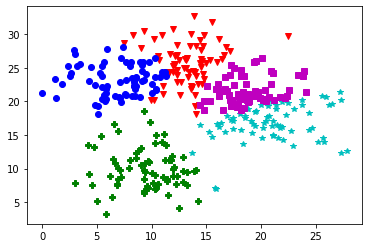

Aplicação do kmeans_capacity_constraints com grau de pertencimento quadrático


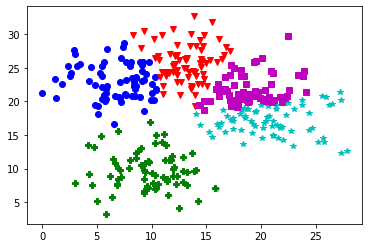

Aplicação do kmeans_capacity_constraints com grau de pertencimento softmax


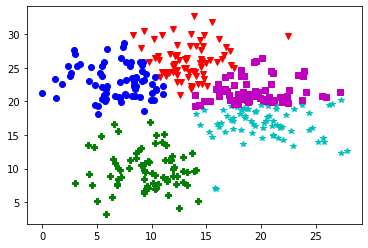

Aplicação do kmeans_constraints_exato


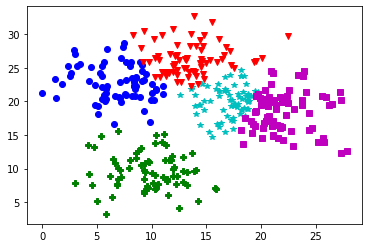

Aplicação do kmeans_modified


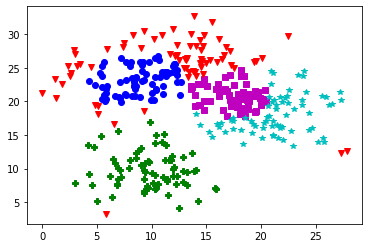

Aplicação do kmeans_constraints_bradley_bennett_demiriz


<Figure size 432x288 with 0 Axes>

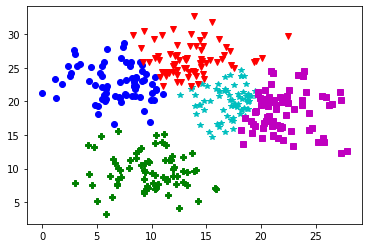


Funções objetivo: [7471.670122971762, 4524.534965157461, 4523.8784627127625, 5080.843536242758, 4748.504081698158, 4872.377104222358]

Silhuetas obtidas: [0.2978782146189276, 0.39467562997684885, 0.39475756716428456, 0.3530521186434095, 0.374232134855955, 0.3699977753933262] 




In [10]:
for path in ['data_7', 'data_8','data_16','data_22']: #datasets.keys():
    val_func_obj = []
    val_silhouette = []
    data = datasets[path]
    n_samples = data['n_samples']
    clusters = data['clusters']
    cluster_std = data['cluster_std']
    X = np.array(data['dataset'])
    Z = np.ones((n_samples,))
    mu = Z.sum()/clusters*np.ones((clusters,))

    a1, b1 = min(X[:,0]), max(X[:,0])
    a2, b2 = min(X[:,1]), max(X[:,1])

    centr_init = [np.concatenate((a1+(b1-a1)*np.random.rand(clusters,1),
                                 a2+(b2-a2)*np.random.rand(clusters,1)), axis=1)
                  for i in range(10)]

    #Plot do conjunto original
    print('\033[1mConjunto Original:', path.split('_')[1],'\033[0m')
    fig = plt.figure()
    plt.plot(X[:,0],X[:,1], 'ok')
    fig.savefig('figures/'+path+'_original.png')
    plt.show()


    #Aplicação do kmeans_capacity_constraints com grau de pertencimento identidade
    print('Aplicação do kmeans_capacity_constraints com grau de pertencimento identidade')

    f_obj_best = np.inf
    for CENTROIDS in centr_init:

        LABELS, ORDER = kmeans_capacity_constraints(X,Z,clusters,pert_ident,np.copy(CENTROIDS),mu)
        labels = LABELS[-1]

        f_obj = funcao_objetivo(X,labels)

        if f_obj<f_obj_best:
            f_obj_best = f_obj
            label_best = labels

    val_func_obj.append(f_obj_best)
    val_silhouette.append(silhouette_score(X, label_best))

    mapping_color = def_color(X,label_best,clusters)
    fig = plt.figure()
    for c in range(clusters):
        color = mapping_color[c]
        marker = def_marker(color)
        X0 = X[[label_best[i] == c for i in range(len(label_best))]]
        plt.plot(X0[:,0], X0[:,1], color+marker)
    fig.savefig('figures/'+path+'_kmcc_ident.png')
    plt.show()


    #Aplicação do kmeans_capacity_constraints com grau de pertencimento quadrático
    print('Aplicação do kmeans_capacity_constraints com grau de pertencimento quadrático')

    f_obj_best = np.inf
    for CENTROIDS in centr_init:

        LABELS, ORDER = kmeans_capacity_constraints(X,Z,clusters,pert_quad,CENTROIDS,mu)
        labels = LABELS[-1]

        f_obj = funcao_objetivo(X,labels)

        if f_obj<f_obj_best:
            f_obj_best = f_obj
            label_best = labels

    val_func_obj.append(f_obj_best)
    val_silhouette.append(silhouette_score(X, label_best))

    mapping_color = def_color(X,label_best,clusters)
    fig = plt.figure()
    for c in range(clusters):
        color = mapping_color[c]
        marker = def_marker(color)
        X0 = X[[label_best[i] == c for i in range(len(label_best))]]
        plt.plot(X0[:,0], X0[:,1], color+marker)
    fig.savefig('figures/'+path+'_kmcc_quad.png')
    plt.show()


    #Aplicação do kmeans_capacity_constraints com grau de pertencimento softmax
    print('Aplicação do kmeans_capacity_constraints com grau de pertencimento softmax')

    f_obj_best = np.inf
    for CENTROIDS in centr_init:

        LABELS, ORDER = kmeans_capacity_constraints(X,Z,clusters,softmax,CENTROIDS,mu)
        labels = LABELS[-1]

        f_obj = funcao_objetivo(X,labels)

        if f_obj<f_obj_best:
            f_obj_best = f_obj
            label_best = labels

    val_func_obj.append(f_obj_best)
    val_silhouette.append(silhouette_score(X, label_best))

    mapping_color = def_color(X,label_best,clusters)
    fig = plt.figure()
    for c in range(clusters):
        color = mapping_color[c]
        marker = def_marker(color)
        X0 = X[[label_best[i] == c for i in range(len(label_best))]]
        plt.plot(X0[:,0], X0[:,1], color+marker)
    fig.savefig('figures/'+path+'_kmcc_soft.png')
    plt.show()


    #Aplicação do kmeans_constraints_exato
    print('Aplicação do kmeans_constraints_exato')

    f_obj_best = np.inf
    for CENTROIDS in centr_init:

        LABELS = kmeans_constraints_exato(X,Z,clusters,CENTROIDS,mu)
        labels = LABELS[-1]

        f_obj = funcao_objetivo(X,labels)

        if f_obj<f_obj_best:
            f_obj_best = f_obj
            label_best = labels

    val_func_obj.append(f_obj_best)
    val_silhouette.append(silhouette_score(X, label_best))

    mapping_color = def_color(X,label_best,clusters)
    fig = plt.figure()
    for c in range(clusters):
        color = mapping_color[c]
        marker = def_marker(color)
        X0 = X[[label_best[i] == c for i in range(len(label_best))]]
        plt.plot(X0[:,0], X0[:,1], color+marker)
    fig.savefig('figures/'+path+'_kmcc_exato.png')
    plt.show()


    #Aplicação do kmeans_modified
    print('Aplicação do kmeans_modified')

    f_obj_best = np.inf
    for CENTROIDS in centr_init:

        LABELS = LABELS, ORDER = kmeans_modified(X,Z,clusters,CENTROIDS,mu)
        labels = LABELS[-1]

        f_obj = funcao_objetivo(X,labels)

        if f_obj<f_obj_best:
            f_obj_best = f_obj
            label_best = labels

    val_func_obj.append(f_obj_best)
    val_silhouette.append(silhouette_score(X, label_best))

    mapping_color = def_color(X,label_best,clusters)
    fig = plt.figure()
    for c in range(clusters):
        color = mapping_color[c]
        marker = def_marker(color)
        X0 = X[[label_best[i] == c for i in range(len(label_best))]]
        plt.plot(X0[:,0], X0[:,1], color+marker)
    fig.savefig('figures/'+path+'_kmeans_modified.png')
    plt.show()


    #Aplicação do kmeans_constraints_bradley_bennett_demiriz
    print('Aplicação do kmeans_constraints_bradley_bennett_demiriz')

    f_obj_best = np.inf
    for CENTROIDS in centr_init:
        size_min = n_samples/clusters
        size_max = size_min

        clf = KMeansConstrained(
            n_clusters=clusters,
            size_min=size_min,
            size_max=size_max,
            random_state=42,
            init=CENTROIDS)

        labels = clf.fit_predict(X)
        f_obj = funcao_objetivo(X,labels)

        if f_obj<f_obj_best:
            f_obj_best = f_obj
            label_best = labels

    val_func_obj.append(f_obj_best)
    val_silhouette.append(silhouette_score(X, label_best))
    
    fig = plt.figure()
    mapping_color = def_color(X,label_best,clusters)
    fig = plt.figure()
    for c in range(clusters):
        color = mapping_color[c]
        marker = def_marker(color)
        X0 = X[[label_best[i] == c for i in range(len(label_best))]]
        plt.plot(X0[:,0], X0[:,1], color+marker)
    fig.savefig('figures/'+path+'_kcddb.png')
    plt.show()

    print('\nFunções objetivo:', [val_func_obj[i] for i in [4,5,3,0,1,2]])
    print('\nSilhuetas obtidas:', [val_silhouette[i] for i in [4,5,3,0,1,2]],'\n\n')

**Estabilidade relativamente aos pontos iniciais**

Conjunto Original: 7 


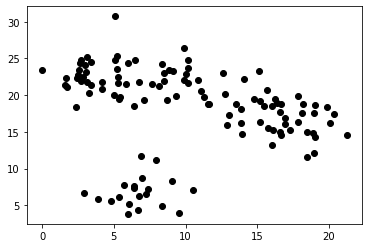

Aplicação do kmeans_capacity_constraints com grau de pertencimento identidade


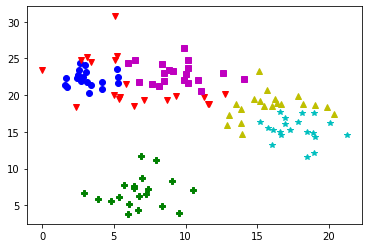

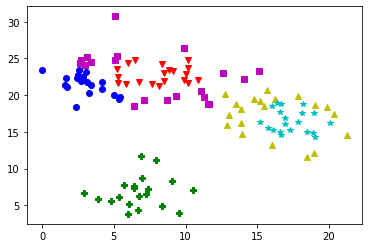

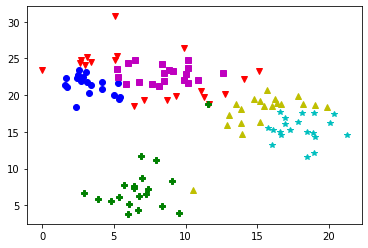

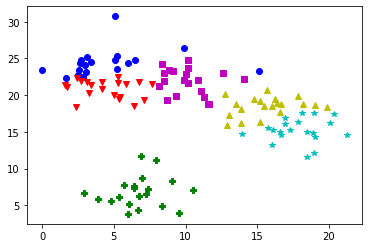

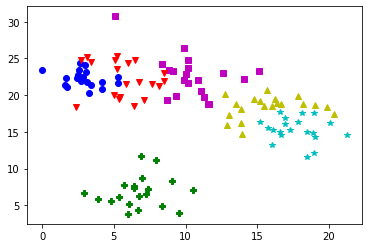

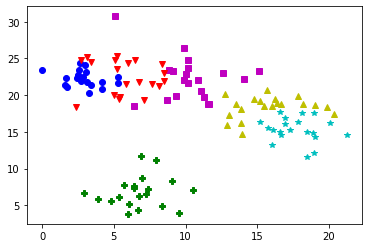

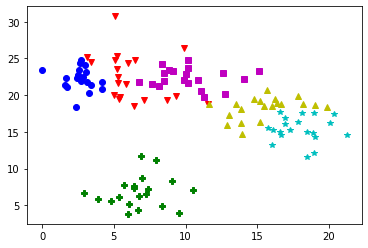

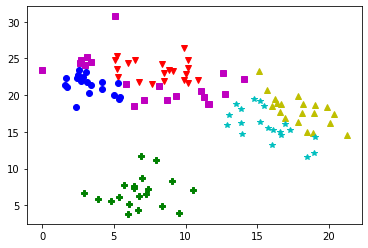

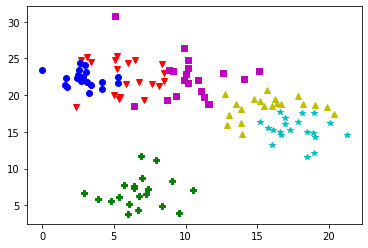

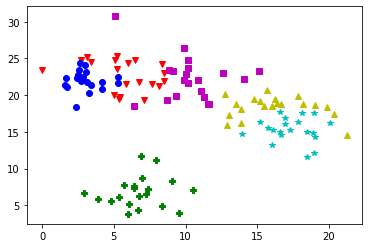

val_func_obj: [999.4660777825462, 1183.0482854689394, 1365.298961182757, 839.0391907562745, 848.0541391355703, 866.3269247690062, 841.0871097786815, 1125.4384304640412, 866.3269247690062, 898.6988630118477]
val_silhouette: [0.3352822199121033, 0.26589279409108785, 0.2981398127128878, 0.3688743597823038, 0.33079149138520064, 0.324288251438226, 0.35418494712537163, 0.29964716659157364, 0.324288251438226, 0.31404887680231386]
Aplicação do kmeans_capacity_constraints com grau de pertencimento quadrático


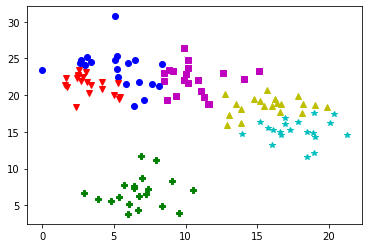

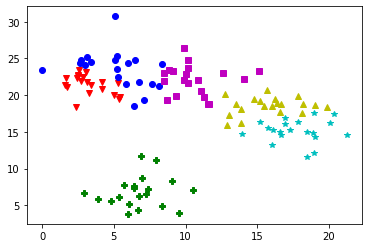

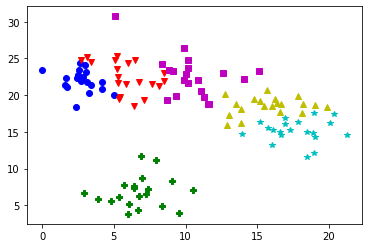

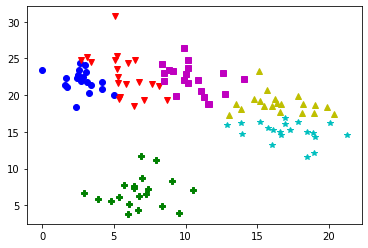

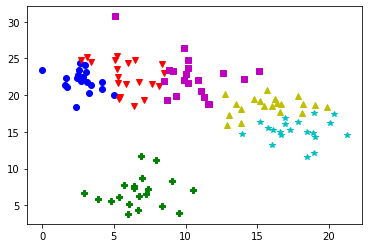

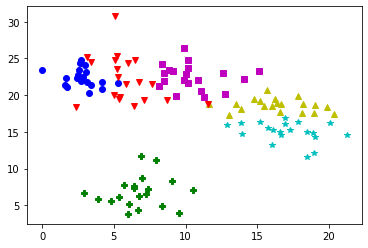

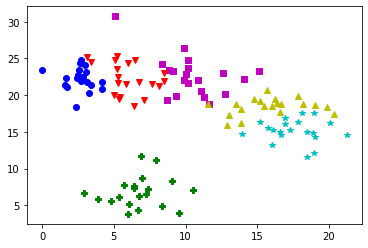

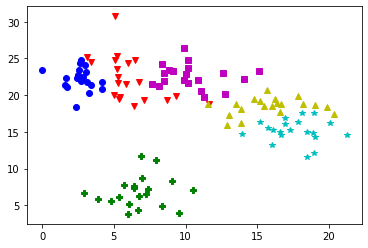

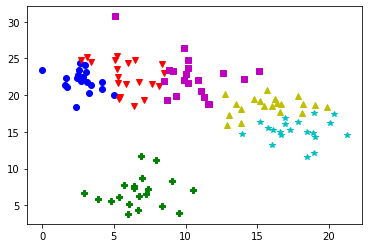

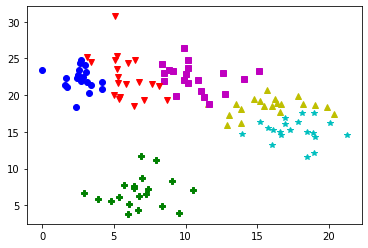

val_func_obj: [783.2331719908909, 783.2331719908909, 807.9769116722679, 778.5807676969947, 805.9184866750142, 830.5530863469664, 805.7159066439008, 822.3899631965487, 805.918486675014, 776.8121573443829]
val_silhouette: [0.3578521620511394, 0.3578521620511394, 0.3514815068796758, 0.3709789539818659, 0.35263539009005185, 0.36152996812530974, 0.3565106714127407, 0.3624305511999951, 0.35263539009005185, 0.36862284353987673]
Aplicação do kmeans_capacity_constraints com grau de pertencimento softmax


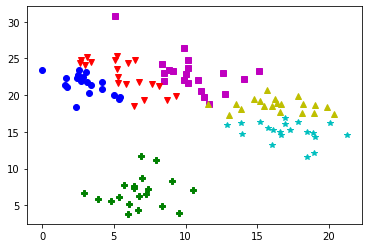

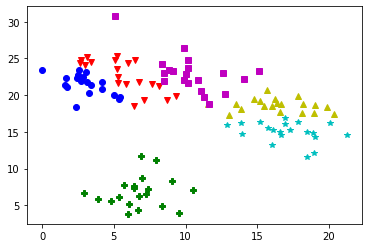

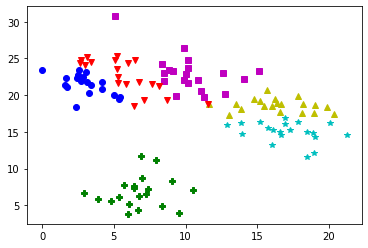

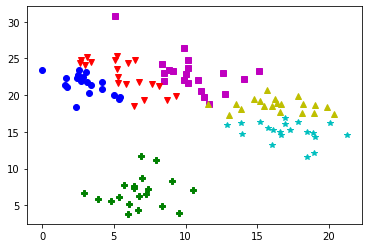

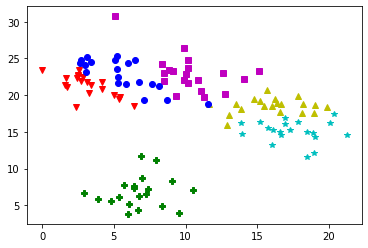

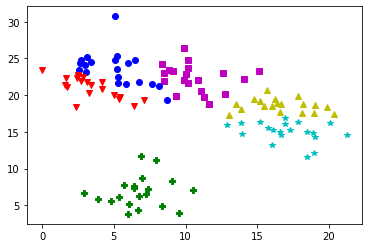

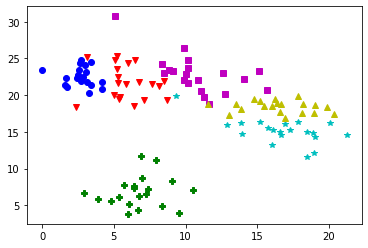

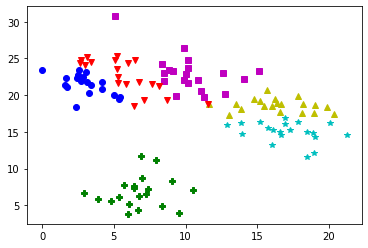

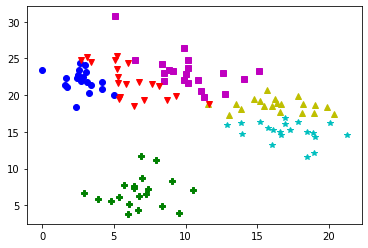

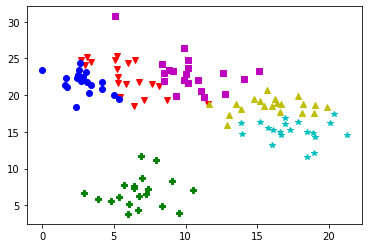

val_func_obj: [844.340198579482, 844.340198579482, 864.3723256226469, 844.3401985794821, 865.0240563175045, 791.5327320270618, 902.1075422073255, 864.3723256226469, 857.3164617441115, 850.7825230455044]
val_silhouette: [0.3442396466211217, 0.3442396466211217, 0.3444673129890635, 0.3442396466211217, 0.3387088760588457, 0.3593826140451701, 0.34538542180964493, 0.3444673129890635, 0.3481625504161599, 0.3434940021145195]
Aplicação do kmeans_constraints_exato


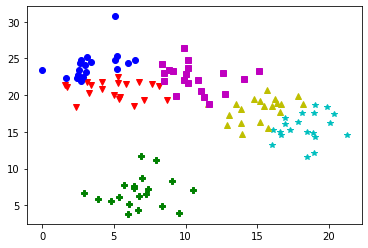

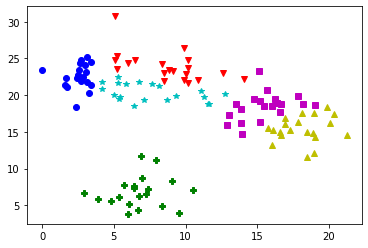

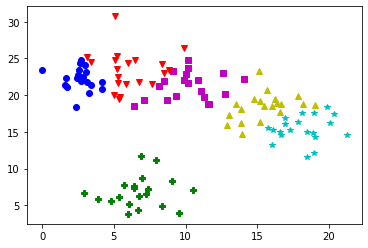

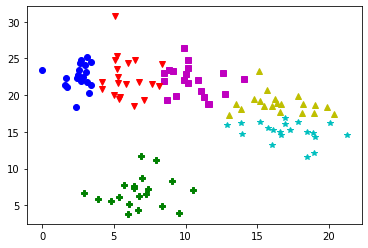

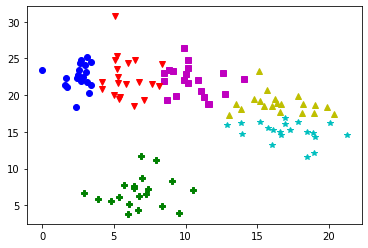

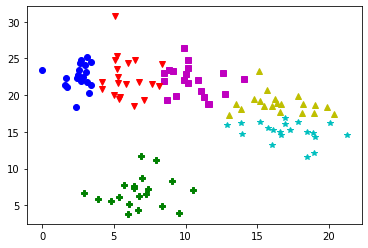

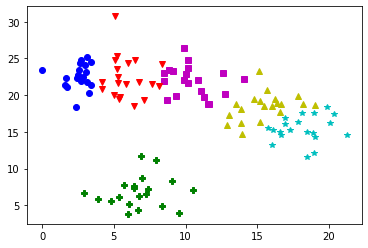

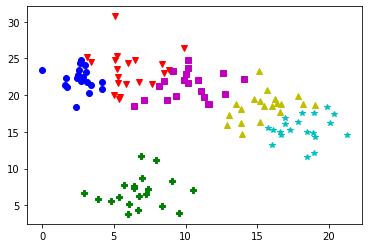

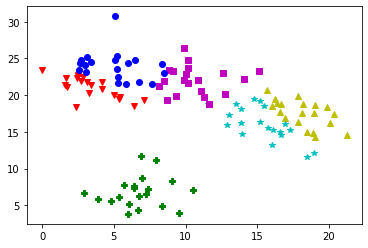

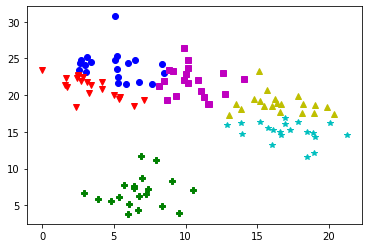

val_func_obj: [716.8275386389371, 810.375945262147, 751.872783531055, 750.516519216642, 750.516519216642, 750.5165192166421, 736.9349551632156, 751.872783531055, 805.7321507093707, 755.0270477375363]
val_silhouette: [0.38886261560742785, 0.37801345973448375, 0.3724890173574449, 0.38552656667943064, 0.38552656667943064, 0.38552656667943064, 0.3864103343315344, 0.3724890173574449, 0.34142686339158496, 0.3724312894092497]
Aplicação do kmeans_modified


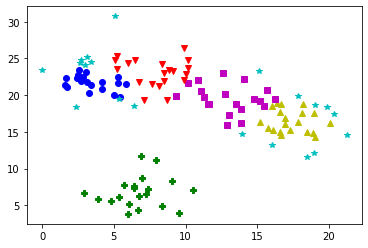

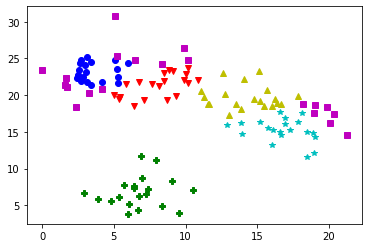

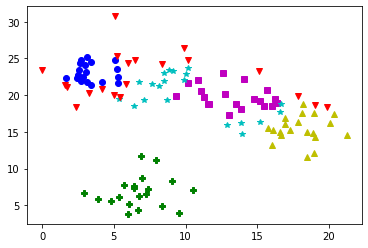

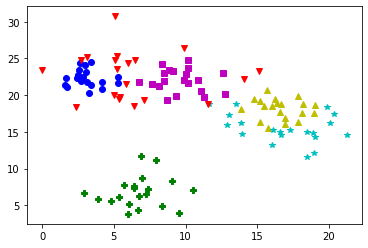

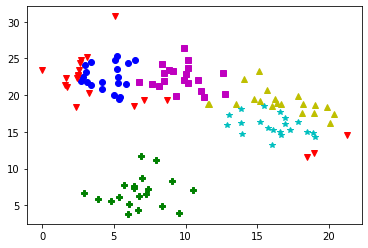

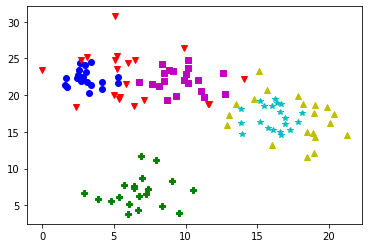

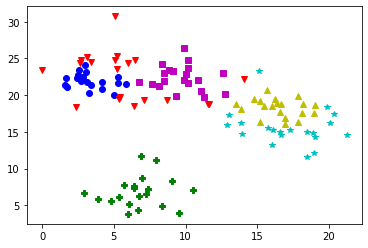

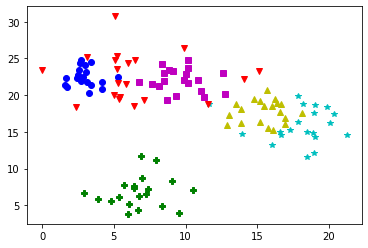

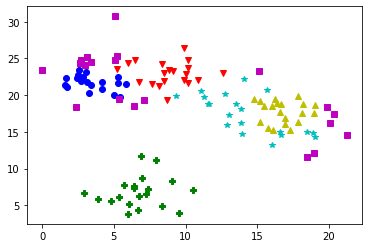

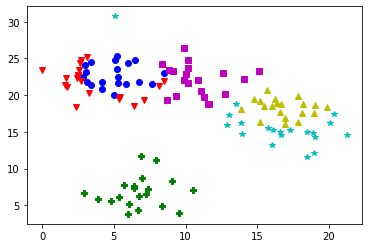

val_func_obj: [2191.8061026574014, 2011.2237560396322, 1672.5340645611955, 1055.9921814163392, 1751.5948825624728, 1084.1924813775154, 1040.6633369246379, 1013.2784571782958, 2250.2715485352114, 1179.668602928201]
val_silhouette: [0.27975243212177603, 0.29947132488330674, 0.2833635329398381, 0.3160063523715811, 0.26666606702871165, 0.28853797091563455, 0.3197648829887696, 0.3316057749011424, 0.2484635257830036, 0.2690694526908398]
Aplicação do kmeans_constraints_bradley_bennett_demiriz


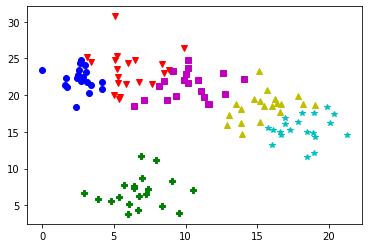

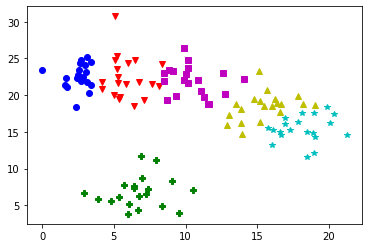

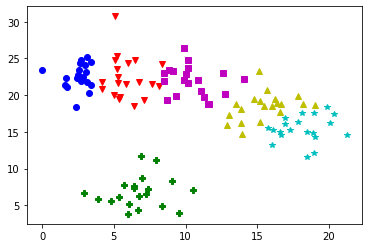

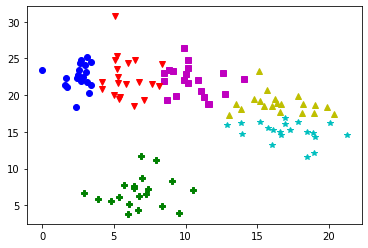

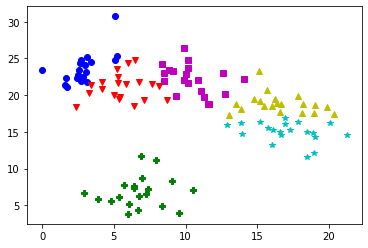

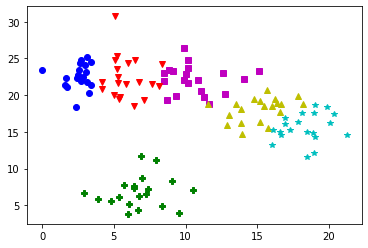

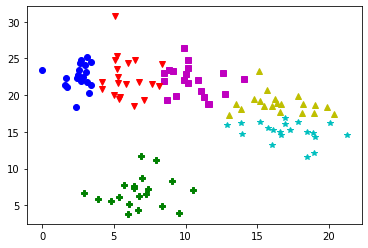

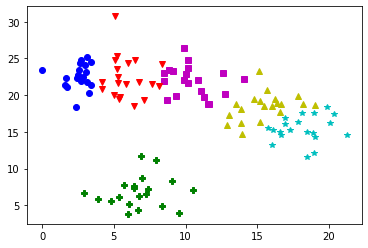

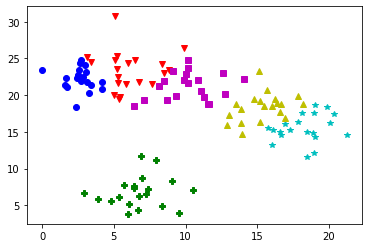

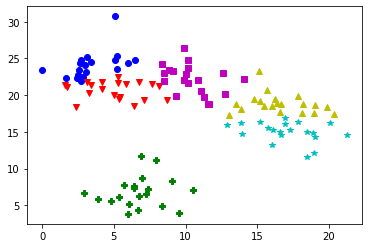

val_func_obj: [751.872783531055, 736.9349551632156, 736.9349551632156, 750.516519216642, 733.5778628380438, 736.4750915860652, 750.516519216642, 736.9349551632156, 751.4515852106397, 733.0010719475034]
val_silhouette: [0.3724890173574449, 0.3864103343315344, 0.3864103343315344, 0.38552656667943064, 0.3907202891142043, 0.3822056966865484, 0.38552656667943064, 0.3864103343315344, 0.3710405983567211, 0.3911004512881677]


In [14]:
for path in ['data_7']:
    data = datasets[path]
    n_samples = data['n_samples']
    clusters = data['clusters']
    cluster_std = data['cluster_std']
    X = np.array(data['dataset'])
    Z = np.ones((n_samples,))
    mu = Z.sum()/clusters*np.ones((clusters,))

    a1, b1 = min(X[:,0]), max(X[:,0])
    a2, b2 = min(X[:,1]), max(X[:,1])

    centr_init = [np.concatenate((a1+(b1-a1)*np.random.rand(clusters,1),
                                 a2+(b2-a2)*np.random.rand(clusters,1)), axis=1)
                  for i in range(10)]

    #Plot do conjunto original
    print('\033[1mConjunto Original:', path.split('_')[1],'\033[0m')
    fig = plt.figure()
    plt.plot(X[:,0],X[:,1], 'ok')
    #fig.savefig('figures/'+path+'_original.png')
    plt.show()


    #Aplicação do kmeans_capacity_constraints com grau de pertencimento identidade
    print('Aplicação do kmeans_capacity_constraints com grau de pertencimento identidade')

    val_func_obj = []
    val_silhouette = []
    count = 1
    for CENTROIDS in centr_init:

        LABELS, ORDER = kmeans_capacity_constraints(X,Z,clusters,pert_ident,np.copy(CENTROIDS),mu)
        labels = LABELS[-1]

        f_obj = funcao_objetivo(X,labels)
        
        mapping_color = def_color(X,labels,clusters)
        fig = plt.figure()
        for c in range(clusters):
            color = mapping_color[c]
            marker = def_marker(color)
            X0 = X[[labels[i] == c for i in range(len(labels))]]
            plt.plot(X0[:,0], X0[:,1], color+marker)
        fig.savefig('figures/'+path+'_kmcc_ident_estab_'+str(count)+'.png')
        count+=1
        plt.show()

        val_func_obj.append(f_obj)
        val_silhouette.append(silhouette_score(X, labels))
    print('val_func_obj:',val_func_obj)
    print('val_silhouette:',val_silhouette)

    #Aplicação do kmeans_capacity_constraints com grau de pertencimento quadrático
    print('Aplicação do kmeans_capacity_constraints com grau de pertencimento quadrático')

    val_func_obj = []
    val_silhouette = []
    count = 1
    for CENTROIDS in centr_init:

        LABELS, ORDER = kmeans_capacity_constraints(X,Z,clusters,pert_quad,CENTROIDS,mu)
        labels = LABELS[-1]
        f_obj = funcao_objetivo(X,labels)
        
        mapping_color = def_color(X,labels,clusters)
        fig = plt.figure()
        for c in range(clusters):
            color = mapping_color[c]
            marker = def_marker(color)
            X0 = X[[labels[i] == c for i in range(len(labels))]]
            plt.plot(X0[:,0], X0[:,1], color+marker)
        fig.savefig('figures/'+path+'_kmcc_quad_estab_'+str(count)+'.png')
        count+=1
        plt.show()

        val_func_obj.append(f_obj)
        val_silhouette.append(silhouette_score(X, labels))

    print('val_func_obj:',val_func_obj)
    print('val_silhouette:',val_silhouette)

    #Aplicação do kmeans_capacity_constraints com grau de pertencimento softmax
    print('Aplicação do kmeans_capacity_constraints com grau de pertencimento softmax')

    val_func_obj = []
    val_silhouette = []
    count = 1
    for CENTROIDS in centr_init:

        LABELS, ORDER = kmeans_capacity_constraints(X,Z,clusters,softmax,CENTROIDS,mu)
        labels = LABELS[-1]
        f_obj = funcao_objetivo(X,labels)
        
        mapping_color = def_color(X,labels,clusters)
        fig = plt.figure()
        for c in range(clusters):
            color = mapping_color[c]
            marker = def_marker(color)
            X0 = X[[labels[i] == c for i in range(len(labels))]]
            plt.plot(X0[:,0], X0[:,1], color+marker)
        fig.savefig('figures/'+path+'_kmcc_soft_estab_'+str(count)+'.png')
        count+=1
        plt.show()

        val_func_obj.append(f_obj)
        val_silhouette.append(silhouette_score(X, labels))

    print('val_func_obj:',val_func_obj)
    print('val_silhouette:',val_silhouette)

    #Aplicação do kmeans_constraints_exato
    print('Aplicação do kmeans_constraints_exato')

    val_func_obj = []
    val_silhouette = []
    count = 1
    for CENTROIDS in centr_init:

        LABELS = kmeans_constraints_exato(X,Z,clusters,CENTROIDS,mu)
        labels = LABELS[-1]
        f_obj = funcao_objetivo(X,labels)
        
        mapping_color = def_color(X,labels,clusters)
        fig = plt.figure()
        for c in range(clusters):
            color = mapping_color[c]
            marker = def_marker(color)
            X0 = X[[labels[i] == c for i in range(len(labels))]]
            plt.plot(X0[:,0], X0[:,1], color+marker)
        fig.savefig('figures/'+path+'_kmcc_exato_estab_'+str(count)+'.png')
        count+=1
        plt.show()

        val_func_obj.append(f_obj)
        val_silhouette.append(silhouette_score(X, labels))

    print('val_func_obj:',val_func_obj)
    print('val_silhouette:',val_silhouette)

    #Aplicação do kmeans_modified
    print('Aplicação do kmeans_modified')

    val_func_obj = []
    val_silhouette = []
    count = 1
    for CENTROIDS in centr_init:

        LABELS = LABELS, ORDER = kmeans_modified(X,Z,clusters,CENTROIDS,mu)
        labels = LABELS[-1]
        f_obj = funcao_objetivo(X,labels)
        
        mapping_color = def_color(X,labels,clusters)
        fig = plt.figure()
        for c in range(clusters):
            color = mapping_color[c]
            marker = def_marker(color)
            X0 = X[[labels[i] == c for i in range(len(labels))]]
            plt.plot(X0[:,0], X0[:,1], color+marker)
        fig.savefig('figures/'+path+'_kmeans_modified_estab_'+str(count)+'.png')
        count+=1
        plt.show()

        val_func_obj.append(f_obj)
        val_silhouette.append(silhouette_score(X, labels))
        
    print('val_func_obj:',val_func_obj)
    print('val_silhouette:',val_silhouette)    

    #Aplicação do kmeans_constraints_bradley_bennett_demiriz
    print('Aplicação do kmeans_constraints_bradley_bennett_demiriz')

    val_func_obj = []
    val_silhouette = []
    count = 1
    for CENTROIDS in centr_init:
        size_min = n_samples/clusters
        size_max = size_min

        clf = KMeansConstrained(
            n_clusters=clusters,
            size_min=size_min,
            size_max=size_max,
            random_state=42,
            init=CENTROIDS)

        labels = clf.fit_predict(X)
        f_obj = funcao_objetivo(X,labels)
        
        mapping_color = def_color(X,labels,clusters)
        fig = plt.figure()
        for c in range(clusters):
            color = mapping_color[c]
            marker = def_marker(color)
            X0 = X[[labels[i] == c for i in range(len(labels))]]
            plt.plot(X0[:,0], X0[:,1], color+marker)
        fig.savefig('figures/'+path+'_kcddb_estab_'+str(count)+'.png')
        count+=1
        plt.show()

        val_func_obj.append(f_obj)
        val_silhouette.append(silhouette_score(X, labels))

    print('val_func_obj:',val_func_obj)
    print('val_silhouette:',val_silhouette)

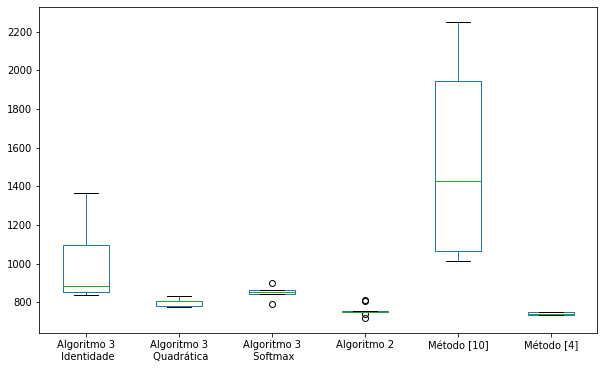

In [7]:
import pandas as pd
fig = plt.figure(figsize=(10,6))
pd.DataFrame([[999.4660777825462, 1183.0482854689394, 1365.298961182757, 839.0391907562745, 848.0541391355703, 866.3269247690062, 841.0871097786815, 1125.4384304640412, 866.3269247690062, 898.6988630118477],
              [783.2331719908909, 783.2331719908909, 807.9769116722679, 778.5807676969947, 805.9184866750142, 830.5530863469664, 805.7159066439008, 822.3899631965487, 805.918486675014, 776.8121573443829],
              [844.340198579482, 844.340198579482, 864.3723256226469, 844.3401985794821, 865.0240563175045, 791.5327320270618, 902.1075422073255, 864.3723256226469, 857.3164617441115, 850.7825230455044],
              [716.8275386389371, 810.375945262147, 751.872783531055, 750.516519216642, 750.516519216642, 750.5165192166421, 736.9349551632156, 751.872783531055, 805.7321507093707, 755.0270477375363],
              [2191.8061026574014, 2011.2237560396322, 1672.5340645611955, 1055.9921814163392, 1751.5948825624728, 1084.1924813775154, 1040.6633369246379, 1013.2784571782958, 2250.2715485352114, 1179.668602928201],
              [751.872783531055, 736.9349551632156, 736.9349551632156, 750.516519216642, 733.5778628380438, 736.4750915860652, 750.516519216642, 736.9349551632156, 751.4515852106397, 733.0010719475034]],
              index = ['Algoritmo 3\n Identidade','Algoritmo 3\n Quadrática','Algoritmo 3\n Softmax','Algoritmo 2', 'Método [10]','Método [4]']).transpose().boxplot()

plt.grid(None)
#fig.savefig('figures/'+path+'_boxplot.png')
plt.show()

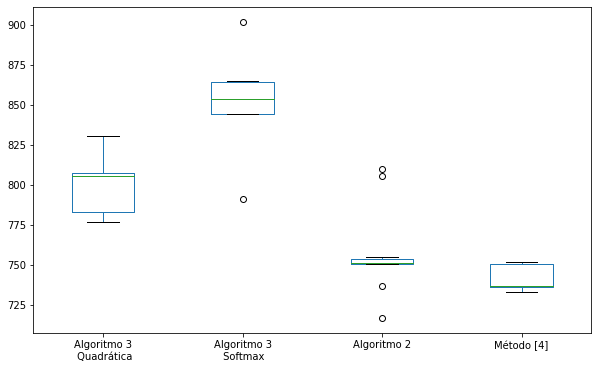

In [5]:
import pandas as pd
fig = plt.figure(figsize=(10,6))
pd.DataFrame([#[999.4660777825462, 1183.0482854689394, 1365.298961182757, 839.0391907562745, 848.0541391355703, 866.3269247690062, 841.0871097786815, 1125.4384304640412, 866.3269247690062, 898.6988630118477],
              [783.2331719908909, 783.2331719908909, 807.9769116722679, 778.5807676969947, 805.9184866750142, 830.5530863469664, 805.7159066439008, 822.3899631965487, 805.918486675014, 776.8121573443829],
              [844.340198579482, 844.340198579482, 864.3723256226469, 844.3401985794821, 865.0240563175045, 791.5327320270618, 902.1075422073255, 864.3723256226469, 857.3164617441115, 850.7825230455044],
              [716.8275386389371, 810.375945262147, 751.872783531055, 750.516519216642, 750.516519216642, 750.5165192166421, 736.9349551632156, 751.872783531055, 805.7321507093707, 755.0270477375363],
              #[2191.8061026574014, 2011.2237560396322, 1672.5340645611955, 1055.9921814163392, 1751.5948825624728, 1084.1924813775154, 1040.6633369246379, 1013.2784571782958, 2250.2715485352114, 1179.668602928201],
              [751.872783531055, 736.9349551632156, 736.9349551632156, 750.516519216642, 733.5778628380438, 736.4750915860652, 750.516519216642, 736.9349551632156, 751.4515852106397, 733.0010719475034]],
              index = ['Algoritmo 3\n Quadrática','Algoritmo 3\n Softmax','Algoritmo 2','Método [4]']).transpose().boxplot()

plt.grid(None)
#fig.savefig('figures/'+path+'_boxplot.png')
plt.show()

### Equi-balanced

Conjunto Original: 2 


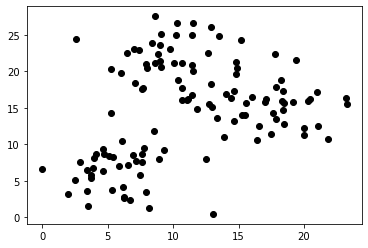

Aplicação do kmeans_capacity_constraints com grau de pertencimento identidade


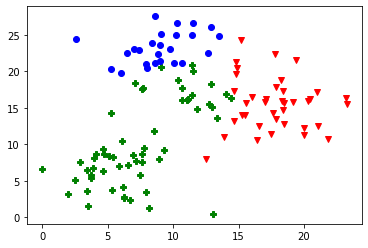

Aplicação do kmeans_capacity_constraints com grau de pertencimento quadrático


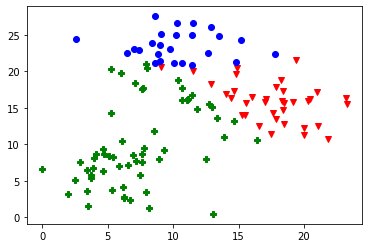

Aplicação do kmeans_capacity_constraints com grau de pertencimento softmax


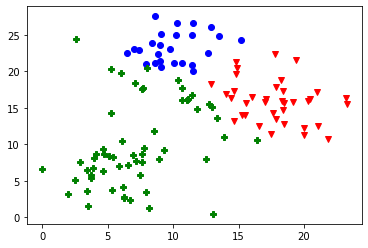

Aplicação do kmeans_constraints_exato


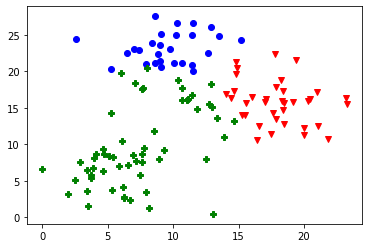


Funções objetivo: [3168.358406443671, 3532.645381621893, 3489.7519092528555, 3368.999933102495]

Silhuetas obtidas: [0.42168995034834006, 0.39317917949279724, 0.3699575778039484, 0.40172635472980034] 


Conjunto Original: 5 


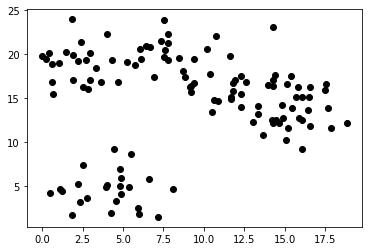

Aplicação do kmeans_capacity_constraints com grau de pertencimento identidade


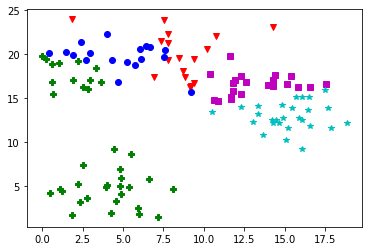

Aplicação do kmeans_capacity_constraints com grau de pertencimento quadrático


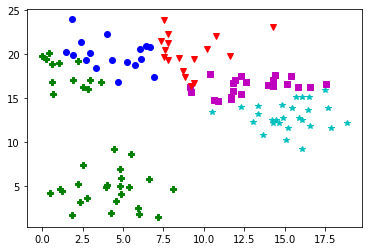

Aplicação do kmeans_capacity_constraints com grau de pertencimento softmax


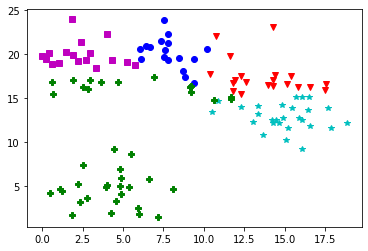

Aplicação do kmeans_constraints_exato


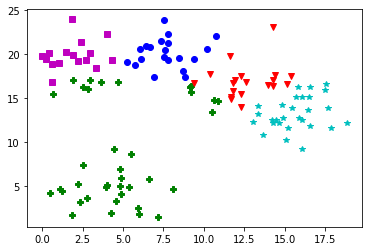


Funções objetivo: [1913.5707685039208, 2332.2397092491915, 2280.2302108403187, 2162.971394623929]

Silhuetas obtidas: [0.3407659140884026, 0.23400681821494976, 0.25863732919432647, 0.2903380965512999] 


Conjunto Original: 7 


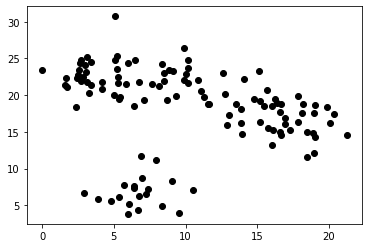

Aplicação do kmeans_capacity_constraints com grau de pertencimento identidade


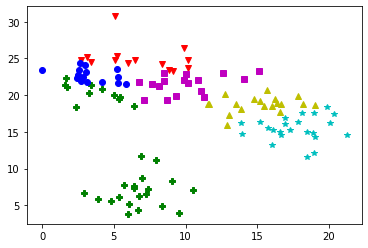

Aplicação do kmeans_capacity_constraints com grau de pertencimento quadrático


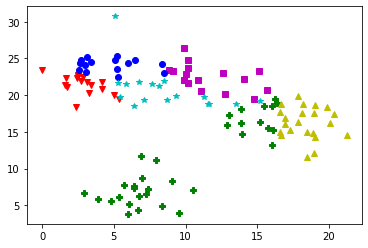

Aplicação do kmeans_capacity_constraints com grau de pertencimento softmax


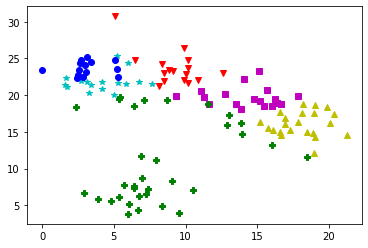

Aplicação do kmeans_constraints_exato


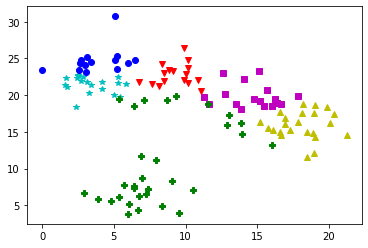


Funções objetivo: [1667.4273581196212, 2103.2131917443076, 2176.1442351928085, 1921.2060507221909]

Silhuetas obtidas: [0.321092461445791, 0.22916140655177886, 0.2561477325239755, 0.24581391644112982] 


Conjunto Original: 8 


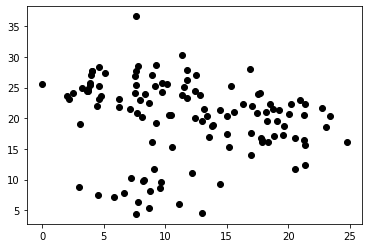

Aplicação do kmeans_capacity_constraints com grau de pertencimento identidade


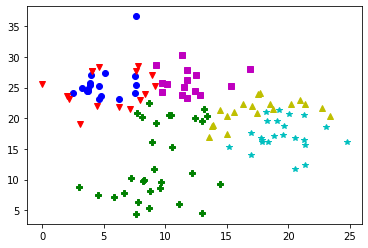

Aplicação do kmeans_capacity_constraints com grau de pertencimento quadrático


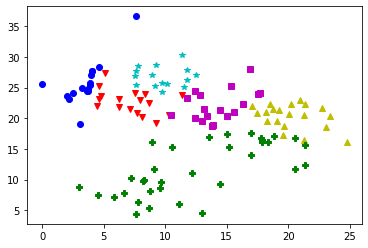

Aplicação do kmeans_capacity_constraints com grau de pertencimento softmax


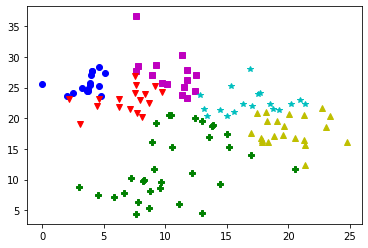

Aplicação do kmeans_constraints_exato


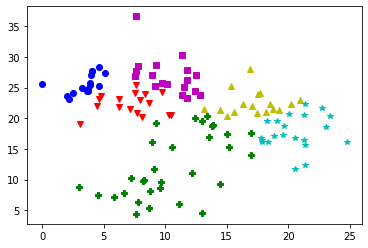


Funções objetivo: [1955.0796508828894, 2352.0472809819057, 2317.8090895133646, 2065.9975376272128]

Silhuetas obtidas: [0.3040653203369878, 0.18940141903114066, 0.2588408594911474, 0.2695647571204954] 


Conjunto Original: 16 


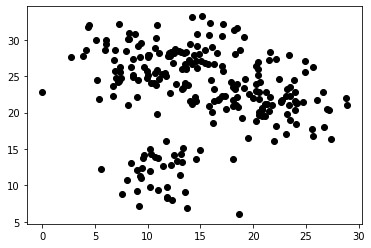

Aplicação do kmeans_capacity_constraints com grau de pertencimento identidade


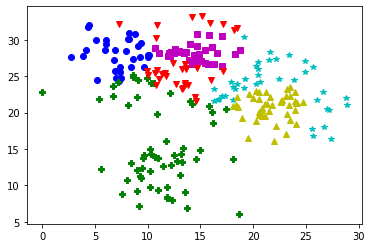

Aplicação do kmeans_capacity_constraints com grau de pertencimento quadrático


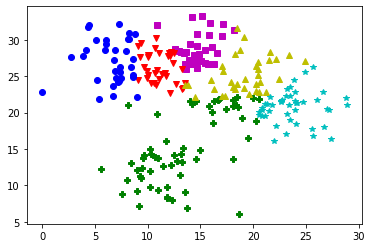

Aplicação do kmeans_capacity_constraints com grau de pertencimento softmax


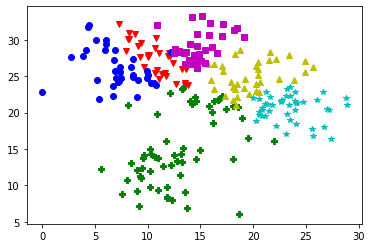

Aplicação do kmeans_constraints_exato


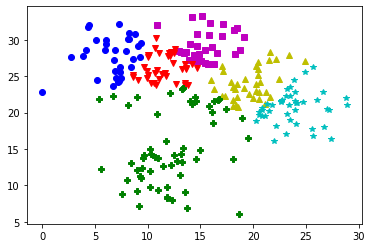


Funções objetivo: [3654.0062875406475, 4758.592019366937, 3948.5062390105945, 3912.4580758776724]

Silhuetas obtidas: [0.2927056028173963, 0.21279383764315143, 0.2776976224535252, 0.26059765214642994] 


Conjunto Original: 22 


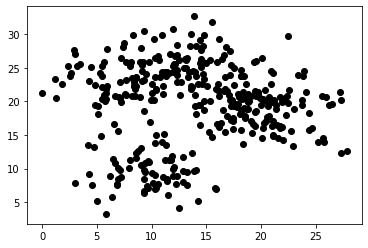

Aplicação do kmeans_capacity_constraints com grau de pertencimento identidade


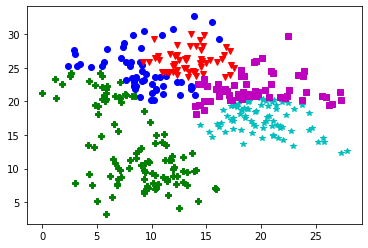

Aplicação do kmeans_capacity_constraints com grau de pertencimento quadrático


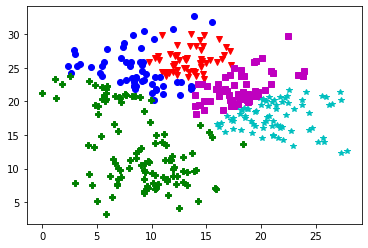

Aplicação do kmeans_capacity_constraints com grau de pertencimento softmax


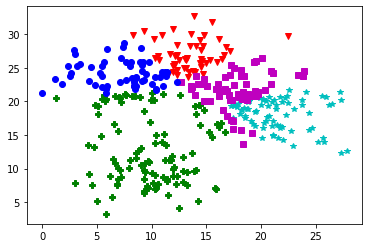

Aplicação do kmeans_constraints_exato


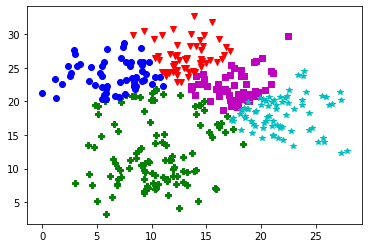


Funções objetivo: [6632.965657853392, 8232.711485494805, 7627.191977828564, 7050.7601534576615]

Silhuetas obtidas: [0.3040199622925512, 0.22441736644190954, 0.261194565412038, 0.2713071789598044] 




In [40]:
for path in ['data_2', 'data_5', 'data_7', 'data_8','data_16','data_22']:
    val_func_obj = []
    val_silhouette = []
    data = datasets[path]
    n_samples = data['n_samples']
    clusters = data['clusters']
    cluster_std = data['cluster_std']
    X = np.array(data['dataset'])
    Z = X[:,1]
    mu = Z.sum()/clusters*np.ones((clusters,))

    a1, b1 = min(X[:,0]), max(X[:,0])
    a2, b2 = min(X[:,1]), max(X[:,1])

    centr_init = [np.concatenate((a1+(b1-a1)*np.random.rand(clusters,1),
                                 a2+(b2-a2)*np.random.rand(clusters,1)), axis=1)
                  for i in range(10)]

    #Plot do conjunto original
    print('\033[1mConjunto Original:', path.split('_')[1],'\033[0m')
    fig = plt.figure()
    plt.plot(X[:,0],X[:,1], 'ok')
    #fig.savefig('figures/'+path+'_original.png')
    plt.show()


    #Aplicação do kmeans_capacity_constraints com grau de pertencimento identidade
    print('Aplicação do kmeans_capacity_constraints com grau de pertencimento identidade')

    f_obj_best = np.inf
    for CENTROIDS in np.copy(centr_init):

        LABELS, ORDER = kmeans_capacity_constraints(X,Z,clusters,pert_ident,np.copy(CENTROIDS),mu)
        labels = LABELS[-1]

        f_obj = funcao_objetivo(X,labels)

        if f_obj<f_obj_best:
            f_obj_best = f_obj
            label_best = labels

    val_func_obj.append(f_obj_best)
    val_silhouette.append(silhouette_score(X, label_best))

    mapping_color = def_color(X,label_best,clusters)
    fig = plt.figure()
    for c in range(clusters):
        color = mapping_color[c]
        marker = def_marker(color)
        X0 = X[[label_best[i] == c for i in range(len(label_best))]]
        plt.plot(X0[:,0], X0[:,1], color+marker)
    fig.savefig('figures/'+path+'_kmcc_balanced_ident.png')
    plt.show()


    #Aplicação do kmeans_capacity_constraints com grau de pertencimento quadrático
    print('Aplicação do kmeans_capacity_constraints com grau de pertencimento quadrático')

    f_obj_best = np.inf
    for CENTROIDS in centr_init:

        LABELS, ORDER = kmeans_capacity_constraints(X,Z,clusters,pert_quad,CENTROIDS,mu)
        labels = LABELS[-1]

        f_obj = funcao_objetivo(X,labels)

        if f_obj<f_obj_best:
            f_obj_best = f_obj
            label_best = labels

    val_func_obj.append(f_obj_best)
    val_silhouette.append(silhouette_score(X, label_best))

    mapping_color = def_color(X,label_best,clusters)
    fig = plt.figure()
    for c in range(clusters):
        color = mapping_color[c]
        marker = def_marker(color)
        X0 = X[[label_best[i] == c for i in range(len(label_best))]]
        plt.plot(X0[:,0], X0[:,1], color+marker)
    fig.savefig('figures/'+path+'_kmcc_balanced_quad.png')
    plt.show()


    #Aplicação do kmeans_capacity_constraints com grau de pertencimento softmax
    print('Aplicação do kmeans_capacity_constraints com grau de pertencimento softmax')

    f_obj_best = np.inf
    for CENTROIDS in centr_init:

        LABELS, ORDER = kmeans_capacity_constraints(X,Z,clusters,softmax,CENTROIDS,mu)
        labels = LABELS[-1]

        f_obj = funcao_objetivo(X,labels)

        if f_obj<f_obj_best:
            f_obj_best = f_obj
            label_best = labels

    val_func_obj.append(f_obj_best)
    val_silhouette.append(silhouette_score(X, label_best))

    mapping_color = def_color(X,label_best,clusters)
    fig = plt.figure()
    for c in range(clusters):
        color = mapping_color[c]
        marker = def_marker(color)
        X0 = X[[label_best[i] == c for i in range(len(label_best))]]
        plt.plot(X0[:,0], X0[:,1], color+marker)
    fig.savefig('figures/'+path+'_kmcc_balanced_soft.png')
    plt.show()


    #Aplicação do kmeans_constraints_exato
    print('Aplicação do kmeans_constraints_exato')

    f_obj_best = np.inf
    for CENTROIDS in centr_init:

        LABELS = kmeans_constraints_exato(X,Z,clusters,CENTROIDS,mu)
        labels = LABELS[-1]

        f_obj = funcao_objetivo(X,labels)

        if f_obj<f_obj_best:
            f_obj_best = f_obj
            label_best = labels

    val_func_obj.append(f_obj_best)
    val_silhouette.append(silhouette_score(X, label_best))

    mapping_color = def_color(X,label_best,clusters)
    fig = plt.figure()
    for c in range(clusters):
        color = mapping_color[c]
        marker = def_marker(color)
        X0 = X[[label_best[i] == c for i in range(len(label_best))]]
        plt.plot(X0[:,0], X0[:,1], color+marker)
    fig.savefig('figures/'+path+'_kmcc_balanced_exato.png')
    plt.show()

    print('\nFunções objetivo:', [val_func_obj[i] for i in [3,0,1,2]])
    print('\nSilhuetas obtidas:', [val_silhouette[i] for i in [3,0,1,2]],'\n\n')